TESTING

In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

df_unesco = pd.read_csv("unesco.csv")
df_unesco.set_index(["Country", "Year"], inplace=True)

df_unesco_w_preds = pd.read_csv("unesco_with_predictions.csv")
df_unesco_w_preds.set_index(["Country", "Year"], inplace=True)

df_unesco_train = pd.read_csv("unesco_train.csv")
df_unesco_train.set_index(["Country", "Year"], inplace=True)
df_unesco_train = df_unesco_train[df_unesco_train["pop14under"] > 0]
df_unesco_train = df_unesco_train.dropna()

In [94]:
# plots country happiness
def plot_country_happiness(country):
    df_country = df_unesco_w_preds.loc[country]
    hapScores = df_country["happinessScore"].sort_index()
    display(hapScores.plot.line())

rf = RandomForestRegressor(n_estimators=100, max_features="sqrt")
ytrain = df_unesco_train["happinessScore"]

def get_usable_features(country):
    usable_features = []
    df_country = df_unesco.loc[country]
    for col in df_country:
        missing_values = len(df_country[df_country[col] <= 0])
        if missing_values < 5:
            usable_features.append(col)
    return usable_features

# plots country happiness taking missing values into account
def plot_country_happiness2(country):
    usable_features = get_usable_features(country)
    Xtrain = df_unesco_train[usable_features]

    Xtest = df_unesco.loc[country][usable_features]
    rf.fit(Xtrain, ytrain)
    ypreds = rf.predict(Xtest)
    country_preds = pd.DataFrame({"Year": Xtest.index, "happinessScore": ypreds})
    display(country_preds.set_index("Year").plot.line())

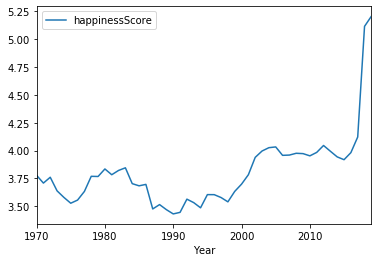

In [95]:
plot_country_happiness2("Cambodia")

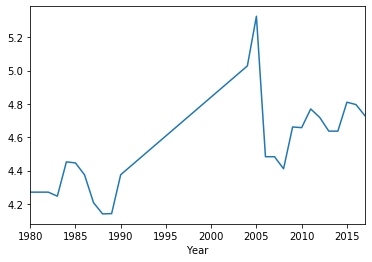

In [96]:
plot_country_happiness("Iraq")

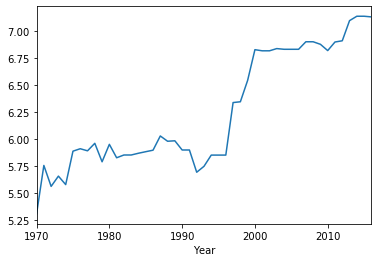

In [97]:
plot_country_happiness("United States")

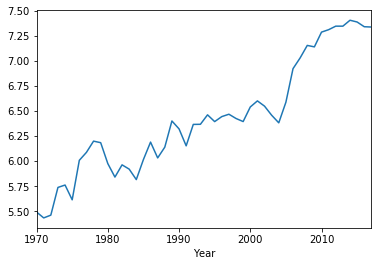

In [99]:
plot_country_happiness("Canada")

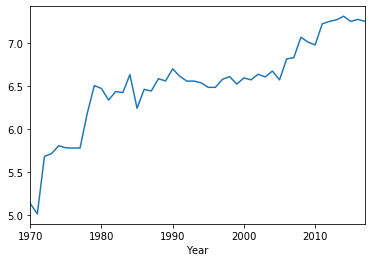

In [100]:
plot_country_happiness("Australia")

In [104]:
df_unesco_w_preds.loc["Vietnam"]

,fertilityRate,lifeExpectancy,mortalityRate,popGrowth,ruralPopPct,gdpUS,gdpPerCapitaUS,gniPerCapita,happinessScore
Year,,,,,,,,,
1989,3.680,70.242,38.4,2.18632,80.109,6.293305e+09,94.27127,210.0,4.3583
1990,3.553,70.536,37.0,2.15202,79.743,6.471741e+09,94.88020,130.0,4.6008
1991,3.415,70.826,35.6,2.11974,79.371,9.613370e+09,137.98256,110.0,4.5451
1992,3.260,71.113,34.1,2.07327,78.994,9.866990e+09,138.71683,130.0,4.6519
1993,3.089,71.399,32.6,1.99042,78.613,1.318095e+10,181.65485,160.0,4.6217
1994,2.904,71.685,31.1,1.86325,78.226,1.628643e+10,220.30998,190.0,4.6217
1995,2.714,71.968,29.6,1.70855,77.834,2.073616e+10,275.75062,250.0,4.7902
1996,2.529,72.248,28.2,1.54879,77.437,2.465747e+10,322.85705,290.0,4.6691
1997,2.359,72.519,26.8,1.40501,77.035,2.684370e+10,346.57901,330.0,4.6377
